In [160]:
%matplotlib widget
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import hdbscan
from sklearn.neighbors import radius_neighbors_graph
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from copy import deepcopy

In [45]:
t = Table.read('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim12/ref/sim12_r_reference.fits')

In [175]:
t['KRON_RADIUS'].mean()*2.5*2

24.53289270401001

In [93]:
features = ['X_IMAGE', 'Y_IMAGE']

In [94]:
objects = t[features].as_array().copy().view(np.float32).reshape(-1, len(features))

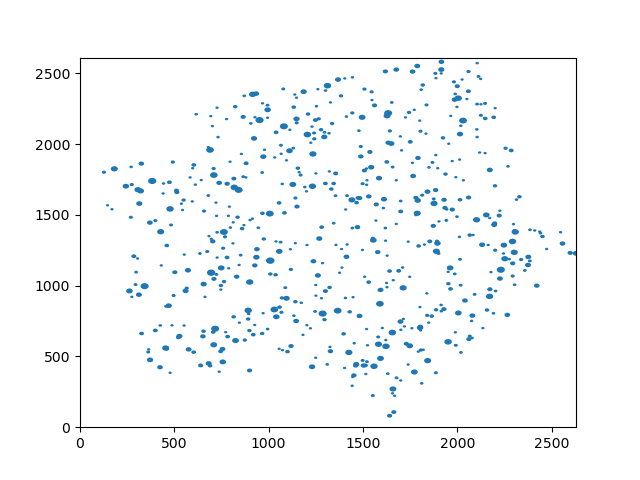

In [169]:
circles = [plt.Circle((t['X_IMAGE'][i], t['Y_IMAGE'][i]), radius=2.5*t['KRON_RADIUS'][i]) for i in range(len(t))]
c = PatchCollection(circles)
fig, ax = plt.subplots()
ax.set_ylim(0, t['Y_IMAGE'].max())
ax.set_xlim(0, t['X_IMAGE'].max())
ax.add_collection(c)
plt.show()

In [170]:
A = radius_neighbors_graph(objects, radius=2.5*2*t['KRON_RADIUS'], mode='connectivity', include_self=True)

In [176]:
cluster = AgglomerativeClustering(connectivity=A, n_clusters=None, distance_threshold=25.).fit_predict(objects)
cluster.max()

/opt/miniconda3/envs/phz/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:279: UserWarning: the number of connected components of the connectivity matrix is 503 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


527

In [177]:
cluster.min()

0

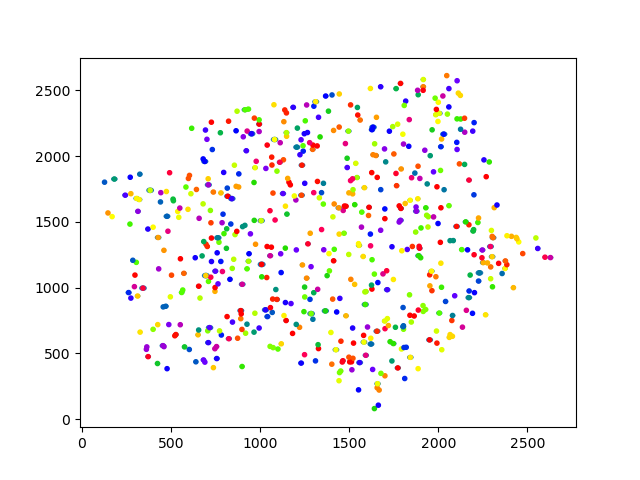

In [180]:
circles = [plt.Circle((t['X_IMAGE'][i], t['Y_IMAGE'][i]), radius=2.5*t['KRON_RADIUS'][i]) for i in range(len(t))]
c = PatchCollection(circles)

fig, ax = plt.subplots()
ax.add_collection(c)
ax.scatter(objects[:,0], objects[:,1], marker='.', c=cluster, cmap='prism')
plt.show()

In [179]:
objects.shape

(584, 2)